In [36]:
import numpy as np
from collections import Counter
from graphviz import Digraph

class Node:

    def __init__(self, frequency, letter=None):

        self.left=None
        self.right=None
        self.parent=None
        self.frequency = frequency
        self.letter = letter if letter is not None else None

    def find_top(self):
        while(True):
            if self.parent is not None:

                self = self.parent
                
            else:
                break
        return self

    def visualize_tree(self):
        def add_nodes_edges(self, dot=None):
            # Create Digraph object
            if dot is None:
                dot = Digraph()
                dot.node(name=str(self), label=str(self.frequency))

            # Add nodes
            if self.left:
                if self.left.letter == None:
                    dot.node(name=str(self.left) ,label=str(self.left.frequency))
                else:
                    dot.node(name=str(self.left) ,label=str(self.left.letter))
                dot.edge(str(self), str(self.left))
                dot = add_nodes_edges(self.left, dot=dot)

            if self.right:
                if self.right.letter == None:
                    dot.node(name=str(self.right) ,label=str(self.right.frequency))
                else:
                    dot.node(name=str(self.right) ,label=str(self.right.letter))

                dot.edge(str(self), str(self.right))
                dot = add_nodes_edges(self.right, dot=dot)

            return dot

        dot = add_nodes_edges(self)

        # Visualize the graph
        display(dot)

        return dot
    

    def display(self):
        lines, *_ = self._display_aux()
        for line in lines:
            print(line)



    def _display_aux(self):
        """Returns list of strings, width, height, and horizontal coordinate of the root."""
        # No child.
        if self.right is None and self.left is None:
            line = '%s' % self.frequency
            width = len(line)
            height = 1
            middle = width // 2
            return [line], width, height, middle

        # Only left child.
        if self.right is None:
            lines, n, p, x = self.left._display_aux()
            s = '%s' % self.frequency
            u = len(s)
            first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s
            second_line = x * ' ' + '/' + (n - x - 1 + u) * ' '
            shifted_lines = [line + u * ' ' for line in lines]
            return [first_line, second_line] + shifted_lines, n + u, p + 2, n + u // 2

        # Only right child.
        if self.left is None:
            lines, n, p, x = self.right._display_aux()
            s = '%s' % self.frequency
            u = len(s)
            first_line = s + x * '_' + (n - x) * ' '
            second_line = (u + x) * ' ' + '\\' + (n - x - 1) * ' '
            shifted_lines = [u * ' ' + line for line in lines]
            return [first_line, second_line] + shifted_lines, n + u, p + 2, u // 2

        # Two children.
        left, n, p, x = self.left._display_aux()
        right, m, q, y = self.right._display_aux()
        s = '%s' % self.frequency
        u = len(s)
        first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s + y * '_' + (m - y) * ' '
        second_line = x * ' ' + '/' + (n - x - 1 + u + y) * ' ' + '\\' + (m - y - 1) * ' '
        if p < q:
            left += [n * ' '] * (q - p)
        elif q < p:
            right += [m * ' '] * (p - q)
        zipped_lines = zip(left, right)
        lines = [first_line, second_line] + [a + u * ' ' + b for a, b in zipped_lines]
        return lines, n + m + u, max(p, q) + 2, n + u // 2





'''
notes: the root index is zero
        for every node with index i the left can be found by 2*i + 1
        for the right it can be found by 2*i + 2
'''
class MinHeap:

    def __init__(self,start_size):

        self.array = np.empty([start_size], dtype='object')
        self.size = 0

    def __len__(self):
        return len(self.size)

    def __str__(self):
        mylist =[]
        for i in range(self.size):
            freq = self.array[i].frequency
            if self.array is not None:
                letter = self.array[i].letter
                mylist.append((freq,letter))
            else:
                mylist.append((freq,None))
        return 'pairlist of frequency&letter: {0}'.format( mylist)


    def resize(self):
        new_size = 2*len(self.array)
        new_array = np.empty([new_size],dtype='object')
        for index in range(self.size):
            new_array[index] = self.array[index]

        self.array = new_array.copy()




    def swap(self, index1, index2):
        temp_node = self.array[index1]
        self.array[index1] = self.array[index2]
        self.array[index2] = temp_node



    def insert_node(self, node): # inserts at the bottom
        if self.size >= len(self.array):
            self.resize()

        index = self.size
        self.array[index] = node
        self.size +=1


        while (index > 0 ):
            if self.array[index].frequency <  self.array[int((index-1)/2)].frequency :
                self.swap(index , int((index-1)/2 )) # switchig parent
                index = int((index - 1)/2)
            else:
                break

    def pop_node(self): # removes root and returns it also takes leaf and makes it root
        root = self.array[0]
        index = 0
        self.array[0] = self.array[self.size - 1] # move last non-None node to root
        self.array[self.size-1] = None # toss out last node
        self.size  -= 1

        while (index < self.size ):
            if (2*index + 1) < self.size and (2*index + 2) < self.size: # check if left and right indices not out of range
                if self.array[(2*index + 1)].frequency <  self.array[(2*index + 2)].frequency   \
                    and  self.array[(2*index + 1)].frequency  < self.array[(index)].frequency :

                    self.swap((2*index + 1) , index ) # switching left child with parent
                    index = (2*index + 1)
                elif self.array[(2*index + 1)].frequency  >  self.array[(2*index + 2)].frequency   \
                    and  self.array[(2*index + 2)].frequency  < self.array[(index)].frequency :

                    self.swap((2*index + 2) , index ) # switching right child with parent
                    index = (2*index + 2)
                else:
                    break
            elif (2*index + 1) < self.size :
                if self.array[(2*index + 1)].frequency  < self.array[(index)].frequency :
                    self.swap((2*index + 1), index ) # switching left child with parent
                    index = (2*index + 1)
                else:
                    break

            elif (2*index + 2) < self.size :
                if self.array[(2*index + 2)].frequency  < self.array[(index)].frequency :
                    self.swap((2*index + 2), index ) # switching right child with parent
                    index = (2*index + 2)
                else:
                    break
            else:
                break

        return root

    #inserts nodes from using values from the dictionary 
    def heapify(self, new_dictionary):
        for letter, frequency in new_dictionary.items():
            node = Node(frequency, letter)
            self.insert_node(node)
        #self.array = self.array[self.array is not np.array(None)]



class Huffman:
    def __init__(self, letter_list=None):
        self.letter_list = letter_list if letter_list is not None else None
        self.bin_dict = {}
        self.bin_tree_list = []

    def encoding(self,root,bits):

        if root is None:
            return
        if root.letter is not None:
            self.bin_dict.update({root.letter: bits})
        self.encoding(root.left, bits + '0')
        self.encoding(root.right, bits + '1')

    def bin_tree(self,root):
        if root is  None:
            return
        if root.letter is not None:
            self.bin_tree_list.append('1')
            self.bin_tree_list.append(root.letter)
        elif root.letter is None:
            self.bin_tree_list.append('0')
            self.bin_tree(root.left)
            self.bin_tree(root.right)


    def huffing(self):
        frequency_dict = Counter(self.letter_list)
        print(frequency_dict)
        heap = MinHeap(len(frequency_dict))
        heap.heapify(frequency_dict)
        merge_heap = MinHeap(len(frequency_dict))

        for count in range(heap.size-1):

            
            if heap.size > 1: 
                lowest = heap.pop_node()
                next_lowest = heap.pop_node()
                node  = Node(lowest.frequency + next_lowest.frequency)
                node.left = lowest
                node.right = next_lowest
                merge_heap.insert_node(node)
            else:
                if heap.size > 0:
                    lowest = heap.pop_node()
                    merge_heap.insert_node(lowest)
                
                
                for next_count in range(merge_heap.size-1):
                    lowest = merge_heap.pop_node()
                    next_lowest = merge_heap.pop_node()
                    print(lowest.frequency)
                    node  = Node(lowest.frequency + next_lowest.frequency)
                    node.left = lowest
                    node.right = next_lowest
                    merge_heap.insert_node(node)
                
                    
                    
                    
                
                
        
        dot = merge_heap.array[0].visualize_tree()

        self.bin_tree(merge_heap.array[0])
        self.encoding(merge_heap.array[0],'')



    def write_code(self):

        with open('huffman.txt', 'w') as writer:
            for value in self.bin_tree_list:
                writer.write(value)

            writer.write('|')
            for letter in self.letter_list:
                code = self.bin_dict[letter]
                writer.write(code)
            self.bin_tree_list = []
            self.bin_dict = {}


    def decode(self):

        root = Node(42)
        iter_code = iter(self.bin_tree_list)
        value = next(iter_code)
        try:
            for i in range(len(self.bin_tree_list)):
                value = next(iter_code)

                if root.left is not None and root.right is not None:
                    root = root.parent

                if value == '0':
                    node = Node(1)
                    if root.left is None:
                        root.left = node
                    else:
                        root.right = node

                    node.parent = root
                    root = node



                elif value == '1':
                    value = next(iter_code)

                    node = Node(2,value)

                    if root.left is None:
                        root.left = node
                    else:
                        root.right = node
                    node.parent = root



        except StopIteration:
                    pass
        root = root.find_top()


        return root




    def read_code(self):
        tree = []
        bin = []
        letters = []


        with open('huffman.txt', 'r') as reader:
            contents = list(reader.read())
            copy_contents = contents.copy()
        for tree_value in contents:
            if (tree_value) == '|':
                copy_contents.pop(0)
                break
            else:
                self.bin_tree_list.append(tree_value)
                copy_contents.pop(0)


        new_tree = self.decode()
        #new_tree.display()
        for bit in copy_contents:



            if  bit == '0' :
                new_tree = new_tree.left
                if new_tree.left is None and new_tree.right == None:
                    letters.append(new_tree.letter)
                    new_tree = new_tree.find_top()


            elif bit == '1':
                new_tree = new_tree.right
                if new_tree.left is None and new_tree.right == None:
                    letters.append(new_tree.letter)
                    new_tree = new_tree.find_top()


        print(letters)
        return letters


Counter({'e': 4, ' ': 3, 'o': 3, 'f': 2, 'd': 2, 'm': 2, 'r': 1, '\n': 1})
2
5
7


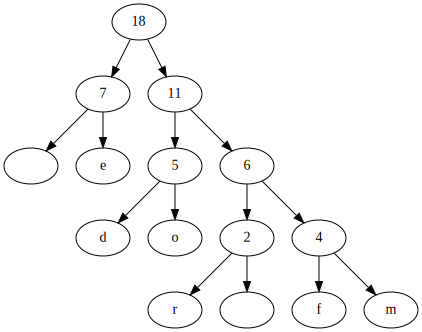

{' ': '00', 'e': '01', 'd': '100', 'o': '101', 'r': '1100', '\n': '1101', 'f': '1110', 'm': '1111'}


In [43]:
#main

with open('message.txt', 'r') as reader:
    contents = list(reader.read())


#print(contents)
huffman = Huffman(contents)
huffman.huffing()
print(huffman.bin_dict)


In [44]:
huffman.write_code()
letters = huffman.read_code()

with open('decoded.txt', 'w') as writer:
    for value in letters:
        writer.write(value)

['f', 'e', 'e', 'd', ' ', 'm', 'e', ' ', 'm', 'o', 'r', 'e', ' ', 'f', 'o', 'o', 'd', '\n']
